# Testing the NLMS performance setting the regressor initialization to zero


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
     'font.size': 14, 
     'mathtext.fontset': 'cm',
     'font.family': 'Times New Roman',
})

In [13]:
T = 2000 #number of iterations
runs = 1000 #number of experiments
M = 200 #filter order
w_o = np.random.randn(M,1) #vetor coluna w^o
s_v = 1e-3 #noise variance
s_u = 1 #input variance
eps = 1e-6 #small constant to avoid division by zero

mu_NLMS = 1

# NLMS implementation

se_NLMS = np.zeros((runs, T))  # squared error
ese_NLMS = np.zeros((runs, T))  # excess squared error
sd_NLMS = np.zeros((runs, T))  # squared deviation

for k in range(runs):
    w_NLMS = np.zeros((M, 1)) 
    u = np.random.randn(1, T) # input signal 
    u_i = np.zeros((1, M)) # regressor
    v = np.random.randn(T) * np.sqrt(s_v) # noise
    y = np.zeros(T) # filter output
    e = np.zeros(T) # error signal
    d = np.zeros(T) # desired signal
    

    for i in range(0, T):
        if i < M:
            u_i[0, :i+1] = u[0, i::-1]
        else:
            u_i[0,:] = u[0, i:i-M:-1]
        d[i] = ((u_i @ w_o) + v[i]).item()
        y[i] = (u_i @ w_NLMS).item()
        e[i] = d[i] - y[i]

        se_NLMS[k, i] = e[i] ** 2
        ese_NLMS[k, i] = ((u_i @ (w_o - w_NLMS)).item()) ** 2
        sd_NLMS[k, i] = np.linalg.norm(w_o - w_NLMS) ** 2

        # Update weights with epsilon to avoid division by zero
        w_NLMS = w_NLMS + ((mu_NLMS * e[i] * u_i.T) / (np.linalg.norm(u_i) ** 2 + eps))

    mse_NLMS = np.mean(se_NLMS, 0)
    emse_NLMS = np.mean(ese_NLMS, 0)
    msd_NLMS = np.mean(sd_NLMS, 0)

    mse_NLMS_db = 10 * np.log10(mse_NLMS) 
    emse_NLMS_db = 10 * np.log10(emse_NLMS) 
    msd_NLMS_db = 10 * np.log10(msd_NLMS)




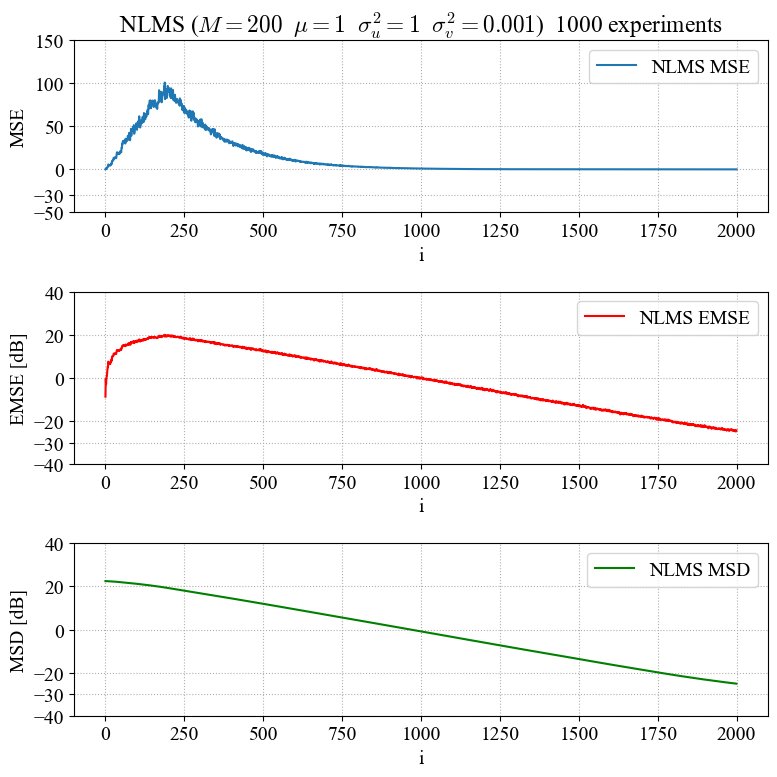

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

axs[0].set_title(rf'NLMS ($M = {M}$  $\mu={mu_NLMS}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[0].plot(mse_NLMS, label='NLMS MSE')
axs[0].set_xlabel('i')
axs[0].set_ylabel('MSE')
axs[0].set_yticks(np.append(axs[0].get_yticks(), -30))
axs[0].grid(linestyle=':')
axs[0].legend()

axs[1].plot(emse_NLMS_db, color='r', label='NLMS EMSE')
axs[1].set_xlabel('i')
axs[1].set_ylabel('EMSE [dB]')
axs[1].set_yticks(np.append(axs[1].get_yticks(), -30))
axs[1].grid(linestyle=':')
axs[1].legend()

axs[2].plot(msd_NLMS_db, color='g', label='NLMS MSD')
axs[2].set_xlabel('i')
axs[2].set_ylabel('MSD [dB]')
axs[2].set_yticks(np.append(axs[2].get_yticks(), -30))
axs[2].grid(linestyle=':')
axs[2].legend()

fig.tight_layout()